In [76]:
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [77]:
if __name__ == "__main__":
    dataset = pd.read_csv('./Data/starbucks.csv')

    #Definimos los features
    X = dataset[[' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ']]
    #Definimos nuestro target
    y = dataset[['Calories']]

    #Dividimos en grupos de entrenamiento

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

    modelLinear = LinearRegression().fit(X_train, y_train)
    y_predict_linear = modelLinear.predict(X_test)
    
    modelLasso = Lasso(alpha=0.02).fit(X_train, y_train)
    y_predict_lasso = modelLasso.predict(X_test)

    modelRidge = Ridge(alpha=1).fit(X_train, y_train)
    y_predict_ridge = modelRidge.predict(X_test)

    linear_loss = mean_squared_error(y_test, y_predict_linear)
    lasso_loss = mean_squared_error(y_test, y_predict_lasso)
    ridge_loss = mean_squared_error(y_test, y_predict_ridge)

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

Validar los tamaños de los datasets

In [78]:
X.shape

(242, 9)

In [79]:
y.shape

(242, 1)

In [80]:
print("Linear Loss: ", linear_loss)
print("Lasso Loss: ", lasso_loss)
print("Ridge Loss: ", ridge_loss)

Linear Loss:  58.08501595878559
Lasso Loss:  58.28741034956814
Ridge Loss:  58.224231844578476


In [81]:
print("="*32)
print("Coef LASSO")
print(modelLasso.coef_)

Coef LASSO
[10.88361375 -4.36408483 -0.         -0.01158141  0.01483739  1.60661663
  1.09644925  2.35571279  4.02597564]


In [82]:
print("="*32)
print("Coef RIDGE")
print(modelRidge.coef_)

Coef RIDGE
[[ 1.08473484e+01 -4.27122790e+00 -1.06991524e+00 -7.66952657e-03
   1.44928240e-02  1.53036783e+00  1.27442576e+00  2.43200702e+00
   4.03468814e+00]]


Graficas del anális

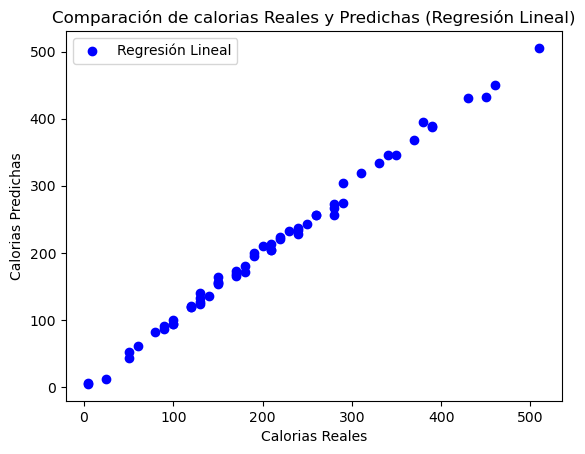

In [83]:
# Gráfico de dispersión para la regresión lineal
plt.scatter(y_test, y_predict_linear, color='blue', label='Regresión Lineal')
plt.xlabel('Calorias Reales')
plt.ylabel('Calorias Predichas')
plt.title('Comparación de calorias Reales y Predichas (Regresión Lineal)')
plt.legend()
plt.show()

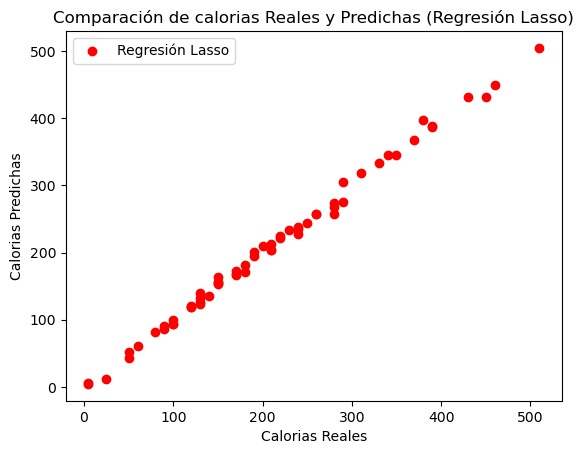

In [84]:
# Gráfico de dispersión para la regresión Lasso
plt.scatter(y_test, y_predict_lasso, color='red', label='Regresión Lasso')
plt.xlabel('Calorias Reales')
plt.ylabel('Calorias Predichas')
plt.title('Comparación de calorias Reales y Predichas (Regresión Lasso)')
plt.legend()
plt.show()

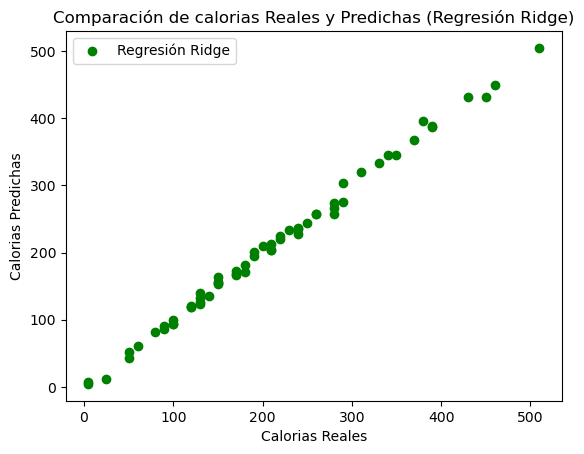

In [85]:
# Gráfico de dispersión para la regresión Ridge
plt.scatter(y_test, y_predict_ridge, color='green', label='Regresión Ridge')
plt.xlabel('Calorias Reales')
plt.ylabel('Calorias Predichas')
plt.title('Comparación de calorias Reales y Predichas (Regresión Ridge)')
plt.legend()
plt.show()

In [86]:
# Agregamos la columna de predicciones al conjunto de datos original
dataset['Calorias predicción'] = modelLinear.predict(X)
dataset.head()

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Calorias predicción
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175,3.785307
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260,4.644481
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330,6.606009
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410,6.606009
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75,64.673975


In [87]:
dataset = pd.read_csv('./Data/starbucks.csv')